# Breast Cancer Prediction

In [0]:
!pwd

/content


## Importing & Reading the data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

### Uploading the files

In [0]:
from google.colab import files
file = files.upload()

Saving xtest.csv to xtest.csv
Saving xtrain.csv to xtrain.csv
Saving ytest.csv to ytest.csv
Saving ytrain.csv to ytrain.csv


### Reading the files

In [0]:
X_train = pd.read_csv("xtrain.csv", header=None)
y_train = pd.read_csv("ytrain.csv", header=None)
X_test = pd.read_csv("xtest.csv", header=None)
y_test = pd.read_csv("ytest.csv", header=None)

## Creating the Classification Model

In [0]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

## Training the Model


In [0]:
rf_classifier.fit(X_train, y_train)
log_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ip

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Making Predictions

In [0]:
rf_pred = rf_classifier.predict(X_test)
lg_pred = log_classifier.predict(X_test)
knn_pred = knn_classifier.predict(X_test)

## Model Evaluation

In [0]:
def right_wrong(y_test, y_pred):
  total = 0
  correct = 0
  wrong = 0
  for i in range(len(y_pred)):
    total=total+1
    if(y_test.at[i,0] == y_pred[i]):
      correct=correct+1
    else:
      wrong=wrong+1

  print("Total: " + str(total))
  print("Correct: " + str(correct))
  print("Wrong: " + str(wrong))

In [0]:
names = ["Random Forest", "Logistic Regression", "K-Nearest Neighbours"]
models = [rf_classifier, log_classifier, knn_classifier]
predictions = [rf_pred, lg_pred, knn_pred]

In [0]:
for name, model, answer in zip(names, models, predictions):
  print(name)
  right_wrong(y_test, answer)
  print()

Random Forest
Total: 114
Correct: 110
Wrong: 4

Logistic Regression
Total: 114
Correct: 110
Wrong: 4

K-Nearest Neighbours
Total: 114
Correct: 109
Wrong: 5



### Confusion Matrix

In [0]:
import matplotlib.pyplot as plt

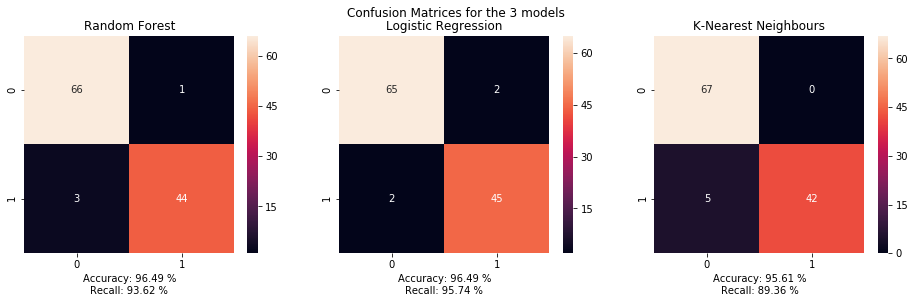

In [0]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

rows = 1
columns = 3

plt.figure(figsize=(16, 4))
for row in range(1, rows+1):
    for column in range(1, columns+1):
        # Confusion matrix, Accuracy, Recall
        cm = confusion_matrix(y_test, predictions[column-1])
        accuracy = accuracy_score(y_test, predictions[column-1]) * 100
        recall = recall_score(y_test, predictions[column-1]) * 100
        # Plots
        plt.subplot(rows, columns, ((row-1)*columns) + column)
        sns.heatmap(cm, annot=True)
        plt.title('{}'.format(names[column-1]))
        plt.xlabel('Accuracy: {} %\nRecall: {} %'.format(round(accuracy, 2), round(recall, 2)))
plt.suptitle('Confusion Matrices for the 3 models')
plt.show()

### Accuracy & Recall

In [0]:
from sklearn.metrics import recall_score, accuracy_score

for name, model, prediction in zip(names, models, predictions):
  accuracy = accuracy_score(y_test, prediction) * 100
  recall = recall_score(y_test, prediction) * 100

  print(name)
  print('Accuracy: {} %\nRecall: {} %'.format(round(accuracy, 2), round(recall, 2)))
  print('\n')

Random Forest
Accuracy: 96.49 %
Recall: 93.62 %


Logistic Regression
Accuracy: 96.49 %
Recall: 95.74 %


K-Nearest Neighbours
Accuracy: 95.61 %
Recall: 89.36 %


